In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
#Create the dataset
X,y = make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=15)

In [4]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,-0.377957,1.043895,1.043494,-0.101838,-1.617442,0.402713,0.913601,-0.067192,0.175471,-1.049646
1,-0.325259,1.276263,-0.686123,-2.463205,-0.489426,-0.240715,-1.469496,1.006633,-0.833692,0.957744
2,0.739019,-0.600903,-0.177294,1.335714,-0.817332,-0.790047,1.457365,-0.218981,0.878643,-1.257740
3,0.474312,-1.103002,1.189936,-0.800186,0.912377,-0.406451,-1.130950,1.985111,1.379029,1.041768
4,0.927365,1.114796,0.080284,1.261064,0.761179,0.921563,0.440832,0.184645,-1.567739,-0.142107
...,...,...,...,...,...,...,...,...,...,...
995,1.538272,0.171629,0.075371,-0.957658,-1.066219,1.158096,-0.036964,0.123689,0.927871,-0.225003
996,-0.060266,0.095018,-0.271685,1.830560,0.219445,-0.341269,1.180088,-0.216876,-1.752938,-0.810152
997,0.675563,-0.538420,-1.299500,0.747835,1.733898,-0.268044,-0.520953,2.043336,0.947388,0.790354
998,2.629710,-2.452899,-1.359785,1.592065,0.854157,1.618828,0.621701,0.378898,-1.971894,-0.252250


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [6]:
#Model training
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression.fit(X_train,y_train)

LogisticRegression()

In [7]:
y_pred = regression.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 0]


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
score = accuracy_score(y_test,y_pred)
print("Accuracy: ",score)
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
report = classification_report(y_test,y_pred)
print(report)

Accuracy:  0.9166666666666666
[[146  11]
 [ 14 129]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       157
           1       0.92      0.90      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



##Hyperparameter Tuning and Cross Validation

In [10]:
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

In [11]:
param = dict(penalty=penalty,C=c_values,solver=solver)

In [12]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [13]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=param,scoring='accuracy',cv=cv,n_jobs=-1)

In [14]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [15]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [16]:
grid.best_score_

0.9242857142857142

In [17]:
y_pred = grid.predict(X_test)
score = accuracy_score(y_test,y_pred)
print("Accuracy: ",score)
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
report = classification_report(y_test,y_pred)
print(report)

Accuracy:  0.92
[[149   8]
 [ 16 127]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       157
           1       0.94      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



#Randomized Search CV

In [18]:
from sklearn.model_selection import RandomizedSearchCV
model = LogisticRegression()
randomcv = RandomizedSearchCV(estimator=model,param_distributions=param,cv=5,scoring='accuracy')

In [19]:
randomcv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [20]:
randomcv.best_score_

0.9214285714285714

In [21]:
randomcv.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 0.1}

In [22]:
y_pred = randomcv.predict(X_test)
score = accuracy_score(y_test,y_pred)
print("Accuracy: ",score)
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
report = classification_report(y_test,y_pred)
print(report)

Accuracy:  0.9166666666666666
[[147  10]
 [ 15 128]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       157
           1       0.93      0.90      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



#Logistic Regression for Multiclass Classification Problems

In [23]:
#Create the dataset
X,y = make_classification(n_samples=1000,n_features=10,n_informative=3,n_classes=3,random_state=15)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
regression2 = LogisticRegression(multi_class='ovr')
regression2.fit(X_train,y_train)
y_pred = regression2.predict(X_test)
score = accuracy_score(y_test,y_pred)
print("Accuracy: ",score)
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
report = classification_report(y_test,y_pred)
print(report)

Accuracy:  0.79
[[84 10  8]
 [ 3 74 25]
 [10  7 79]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       102
           1       0.81      0.73      0.77       102
           2       0.71      0.82      0.76        96

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



#Logistic Regression for Imbalanced Dataset

In [26]:
#Generate and plot synthetic imblanced dataset
from collections import Counter
from sklearn.datasets import make_classification

In [27]:
#Imbalanced Dataset
X,y = make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

<Axes: xlabel='0', ylabel='1'>

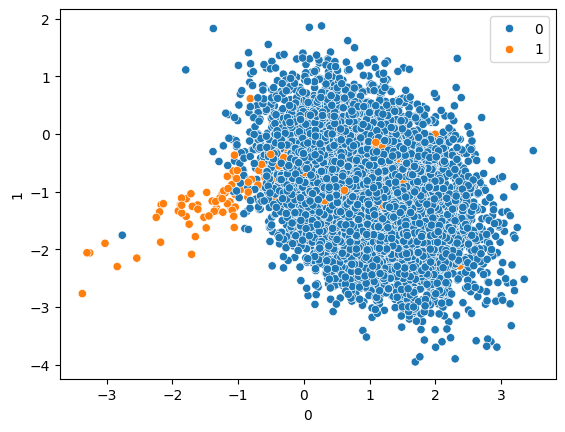

In [28]:
df = pd.DataFrame(X)[0]
df1 = pd.DataFrame(X)[1]
sns.scatterplot(x=df,y=df1,hue=y)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
#Hyperparametr Tuning
model1 = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,10,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [31]:
param1 = dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)
param1

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 10, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [32]:
cv1 = StratifiedKFold()
grid1 = GridSearchCV(estimator=model1,param_grid=param1,scoring='accuracy',cv=cv1)
grid1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 10, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [33]:
grid1.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [34]:
grid1.best_score_

0.9882666666666667

In [36]:
y_pred = grid1.predict(X_test)
score = accuracy_score(y_test,y_pred)
print("Accuracy: ",score)
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
report = classification_report(y_test,y_pred)
print(report)

Accuracy:  0.9896
[[2465    0]
 [  26    9]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       1.00      0.26      0.41        35

    accuracy                           0.99      2500
   macro avg       0.99      0.63      0.70      2500
weighted avg       0.99      0.99      0.99      2500



#Logistic Regression with ROC Curve and ROC AUC Score

In [57]:
#ROC Curve and AUC
from sklearn.metrics import roc_curve,roc_auc_score

In [58]:
#Generate two class dataset
X,y=make_classification(n_samples=1000,n_classes=2,random_state=1)

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [60]:
#Create a dummy model(majority class)
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [61]:
model2=LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

In [62]:
#Prediction based on probability
model_prob = model2.predict_proba(X_test)

In [63]:
model_prob = model_prob[:,1]
model_prob

array([9.99041628e-01, 9.68848723e-02, 4.89143923e-01, 8.10045348e-01,
       1.12535013e-01, 4.39735016e-01, 8.29517239e-01, 7.13616861e-01,
       8.87664170e-01, 8.67968144e-01, 5.43617813e-04, 8.31130052e-01,
       1.91025094e-01, 5.39054551e-01, 7.27839945e-01, 8.23641256e-01,
       9.38519381e-01, 6.38212418e-01, 1.10081445e-01, 2.41179231e-01,
       1.15804251e-02, 4.90022043e-01, 8.88175764e-01, 9.97949341e-01,
       1.36914748e-01, 1.32490741e-02, 6.44945498e-01, 9.69562066e-01,
       3.98582561e-02, 2.38056200e-02, 3.69666691e-01, 3.40138006e-02,
       2.29664570e-01, 9.57072190e-01, 5.44706719e-01, 6.56742619e-01,
       1.51975226e-02, 2.93295247e-02, 7.80387324e-01, 2.98693396e-02,
       9.28402065e-01, 8.43433686e-01, 1.59962678e-02, 5.77840462e-04,
       6.60841352e-02, 6.69143319e-02, 9.97950938e-01, 6.55795011e-01,
       8.93893406e-01, 6.05940430e-02, 2.10332584e-02, 3.23542888e-02,
       1.03343289e-01, 5.43560862e-02, 5.64600142e-01, 9.87040875e-01,
      

In [65]:
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


In [70]:
#Calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test,dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test,model_prob)

In [72]:
thresholds

array([           inf, 9.99738592e-01, 9.87040875e-01, 9.86379569e-01,
       9.57807758e-01, 9.57072190e-01, 9.45358918e-01, 9.40467971e-01,
       9.28352122e-01, 9.27301113e-01, 9.25546499e-01, 9.23675753e-01,
       8.94689922e-01, 8.93893406e-01, 8.43433686e-01, 8.38350348e-01,
       8.28678141e-01, 8.26515102e-01, 8.08619980e-01, 8.06380714e-01,
       7.80387324e-01, 7.64061119e-01, 7.63865215e-01, 7.63295056e-01,
       7.58516782e-01, 7.55239387e-01, 7.52535126e-01, 7.47974480e-01,
       7.23463245e-01, 7.22944858e-01, 6.74522461e-01, 6.56742619e-01,
       6.55332712e-01, 6.26800183e-01, 5.99853807e-01, 5.57961256e-01,
       5.39054551e-01, 5.14148751e-01, 5.05106145e-01, 4.96241078e-01,
       4.90022043e-01, 4.84956016e-01, 4.69101337e-01, 4.50840890e-01,
       4.46447154e-01, 4.39735016e-01, 4.24228884e-01, 3.24445069e-01,
       3.12824361e-01, 3.06577477e-01, 3.01384481e-01, 2.10359803e-01,
       2.06155010e-01, 1.91025094e-01, 1.69812812e-01, 1.42728321e-01,
      

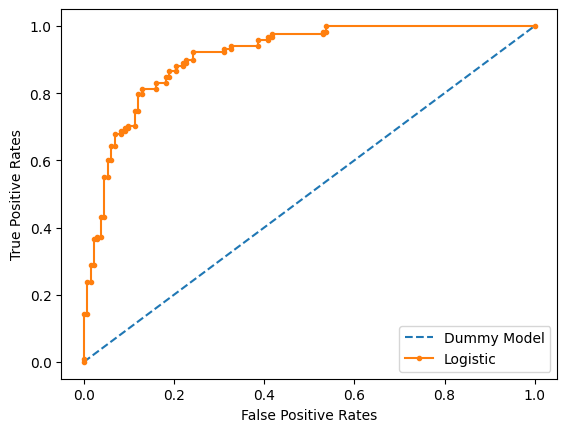

In [73]:
#Plot the ROC Curve for the model
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.legend()
plt.show()

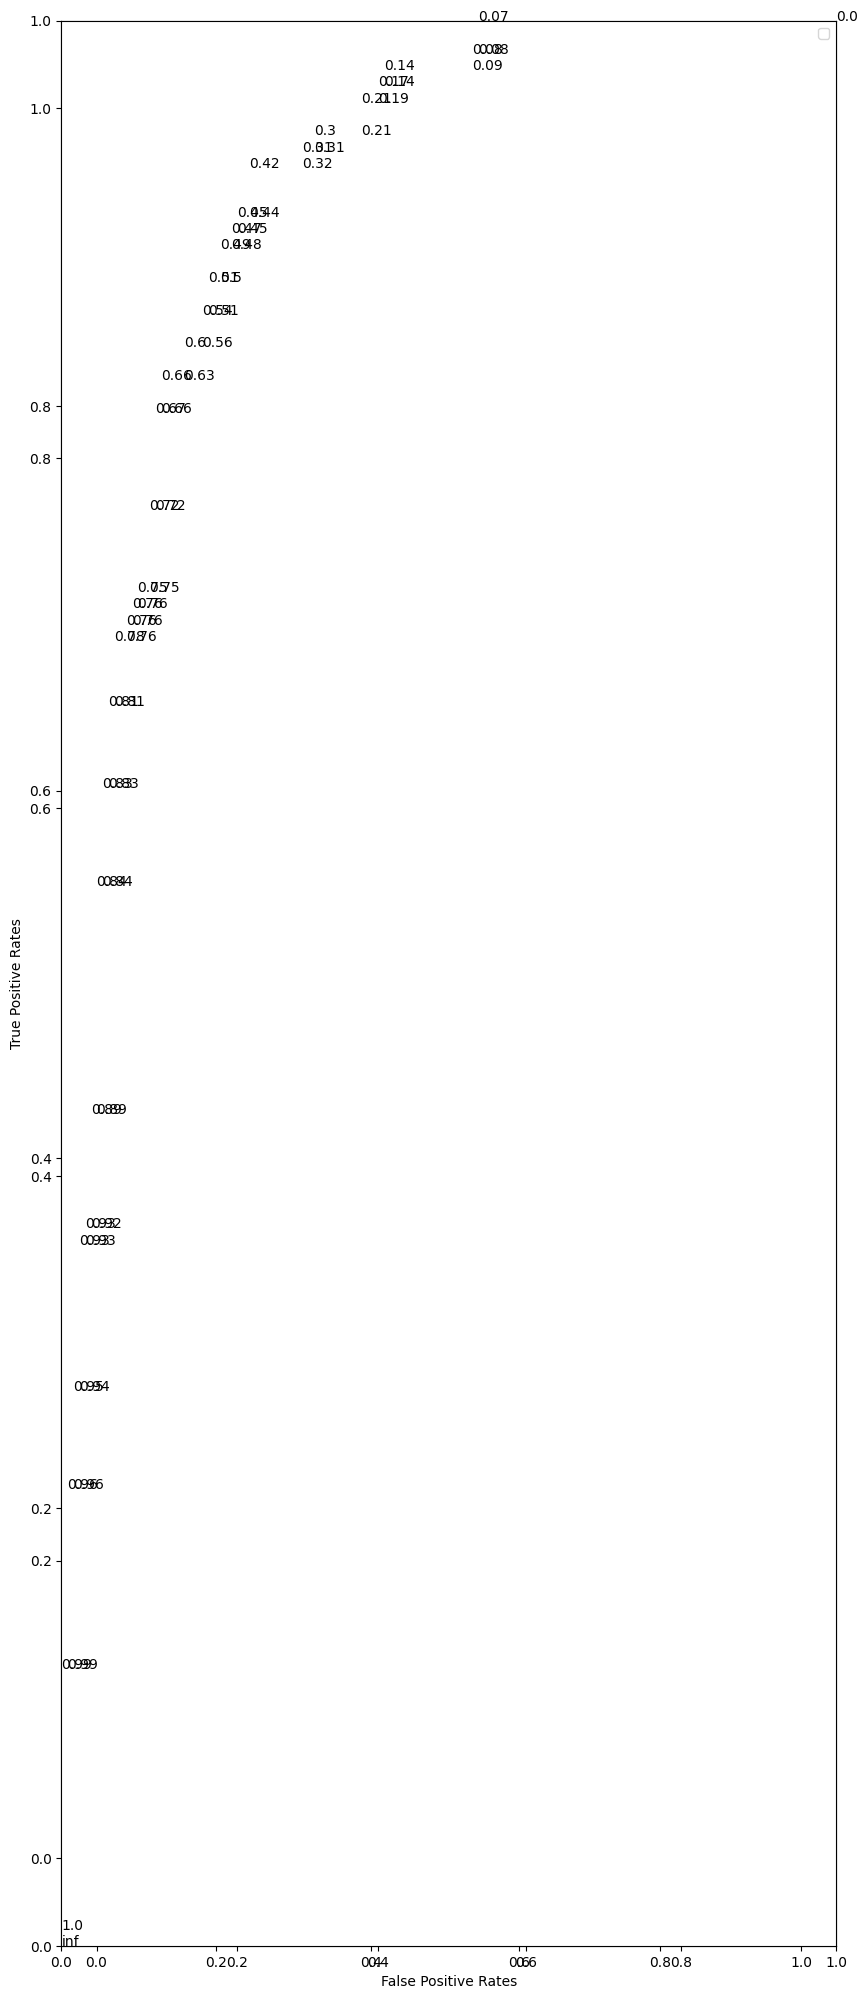

In [79]:
fig = plt.figure(figsize=(10,25))
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,thresholds):
  ax.annotate('%s' % np.round(xyz[2],2),xy=(xyz[0],xyz[1]))
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.legend()
plt.show()